### Data Extraction

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
pd_fake = pd.read_csv("./Fake.csv")

In [3]:
#fake news are tagged as 0
pd_fake['type'] = 0

In [4]:
pd_true = pd.read_csv("./True.csv")

In [5]:
#factual news are tagged as 1
pd_true['type'] = 1

In [6]:
pd_fake.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
pd_true.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
#merge the 2 datasets together
pd_combined = pd.concat([pd_fake, pd_true], axis = 0)

In [9]:
pd_combined.shape

(44898, 5)

In [10]:
pd_combined.dtypes

title      object
text       object
subject    object
date       object
type        int64
dtype: object

In [11]:
#check for nan and null values
pd_combined.isna().sum()

title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [12]:
pd_combined.isnull().sum()

title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [13]:
pd_combined['content'] = pd_combined['text'] + " "+ pd_combined['title'] + " " + pd_combined['subject']

In [14]:
del pd_combined['text']
del pd_combined['title']
del pd_combined['subject']

In [15]:
del pd_combined['date']

### Cleaning

In [16]:
def clean_content(comment):
 
    # Remove non-letters (e.g.punctuations, emojis etc.).
    letters_only = re.sub("[^a-zA-Z]", " ", comment)
    
    # Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # Convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [17]:
#apply clean_content function to pd_combined
pd_combined['content'] = pd_combined['content'].apply(clean_content)

In [18]:
pd_combined.head()

,type,content
0,0,donald trump wish americans happy new year lea...
1,0,house intelligence committee chairman devin nu...
2,0,friday revealed former milwaukee sheriff david...
3,0,christmas day donald trump announced would bac...
4,0,pope francis used annual christmas day message...


### Lemmatizing

In [19]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

In [20]:
# Define function to lemmatize the words.
def lemmatize_words(content):
    word = content.split()
    lemma_words = ''
    for i in word:
        lemma_words += lemmatizer.lemmatize(i) + ' '
    return lemma_words

In [21]:
#apply lemmatize_words function to pd_combined
pd_combined['content'] = pd_combined['content'].apply(lemmatize_words)

In [22]:
pd_combined.head()

,type,content
0,0,donald trump wish american happy new year leav...
1,0,house intelligence committee chairman devin nu...
2,0,friday revealed former milwaukee sheriff david...
3,0,christmas day donald trump announced would bac...
4,0,pope francis used annual christmas day message...


### Train Test Split

In [23]:
X = pd_combined['content']
y = pd_combined['type']

In [24]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=22)

### Count Vectorizer

In [25]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(ngram_range=(1,2))

In [26]:
#Fit and transform train dataset
train = cvec.fit_transform(x_train)

In [27]:
#Transform test dataset
test = cvec.transform(x_test)

### Modelling

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Using TensorFlow backend.


In [38]:
model = Sequential()
model.add(Dense(2, # No. of neurons in the first layer. #Reduced neurons for local machine to run.
                input_dim=train.shape[1],
                activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(train, y_train, epochs=5)

Epoch 1/5
33673/33673 [==============================] - 1820s 54ms/step - loss: 0.0733 - accuracy: 0.9893
Epoch 2/5
33673/33673 [==============================] - 1754s 52ms/step - loss: 0.0060 - accuracy: 0.9999
Epoch 3/5
33673/33673 [==============================] - 1805s 54ms/step - loss: 0.0044 - accuracy: 0.9999
Epoch 4/5
33673/33673 [==============================] - 1771s 53ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 5/5
33673/33673 [==============================] - 2701s 80ms/step - loss: 0.0032 - accuracy: 1.0000


In [42]:
predictions  =  model.predict(test)

In [49]:
for i in range(len(predictions)):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0

### Model Evaluation

In [47]:
# Import confusion matrix.
from sklearn.metrics import confusion_matrix

In [55]:
cm=confusion_matrix(y_test, # True values.
                 predictions)  # Predicted values.

In [56]:
cm

array([[5864,   20],
       [  14, 5327]], dtype=int64)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [53]:
# What is the specificity of our test set?

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9966


In [54]:
# What is the sensitivity of our test set?

sens = tp / (tp + fn)

print(f'Specificity: {round(sens,4)}')

Specificity: 0.9974


In [57]:
cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

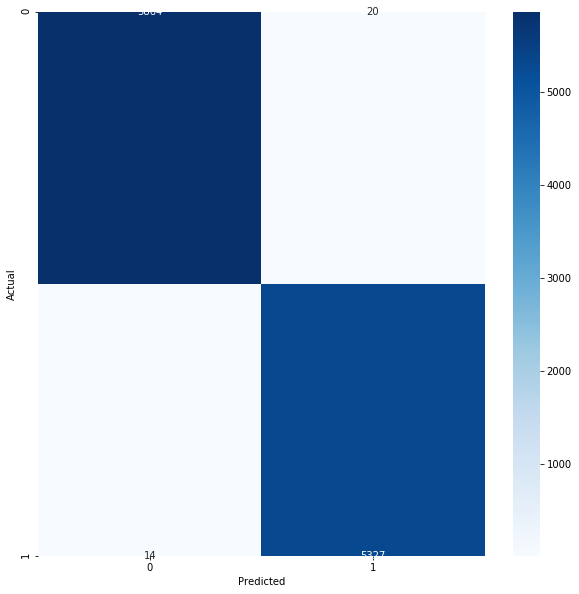

In [62]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",annot = True, fmt='')